# Linear Regression

## Normal Equation 

In [4]:
import numpy as np

X = np.array([
    [1, 1],
    [1, 2],
    [1, 3]
])
y = np.array([
    [3],
    [5],
    [8]
])

theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(theta.round(2))   
# 0.33 ← θ₀ (bias)
# 2.5  ← θ₁ (hours weight)

[[0.33]
 [2.5 ]]


In [5]:
#Calculation for mean square error(mse)
y_pred=X @ theta
errors=y_pred-y

mse=(errors.T @ errors)/len(y)
print(mse)

[[0.05555556]]


In [6]:
np.random.seed(42)
m=100
X=2* np.random.rand(m,1)
noise=np.random.randn(m,1)

y=6 + 5*X+noise


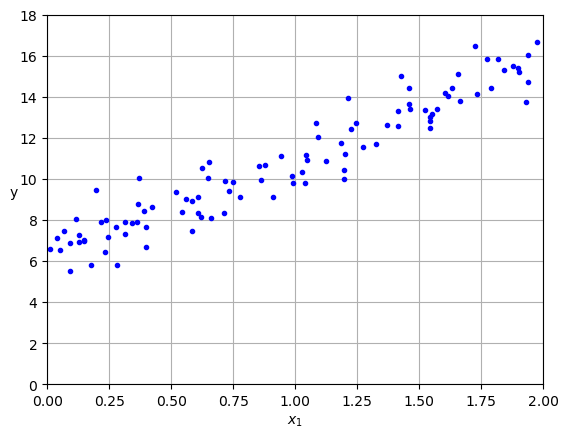

In [7]:
import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.axis([0,2,0,18])
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)
plt.grid()
plt.show()

In [8]:
from sklearn.preprocessing import add_dummy_feature
X_bias=add_dummy_feature(X)

theta_best=np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
theta_best

array([[6.21509616],
       [4.77011339]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
print(X_new)
print(X_new_b)
print(y_predict)


[[0]
 [2]]
[[1. 0.]
 [1. 2.]]
[[ 6.21509616]
 [15.75532293]]


Text(0, 0.5, 'y')

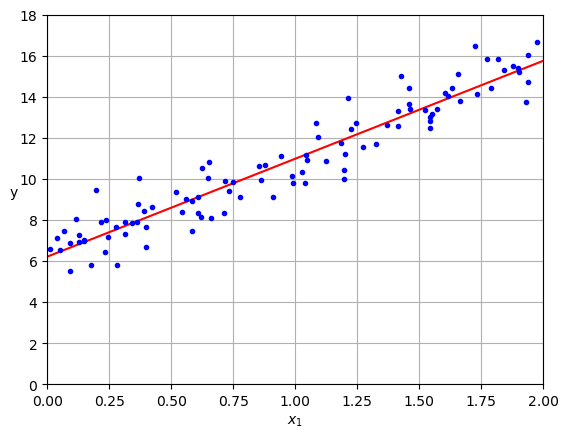

In [10]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0,2,0,18])
plt.grid()
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([6.21509616]), array([[4.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[ 6.21509616],
       [15.75532293]])

In [13]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_bias,y,rcond=1e-6)
theta_best_svd

array([[6.21509616],
       [4.77011339]])

In [14]:
np.linalg.pinv(X_bias)@y

array([[6.21509616],
       [4.77011339]])

# Gradient Descent

## Batch Gradient Descent

In [17]:
eta=0.1   #Learning Rate
n_epoch=1000 # How many iterations over the dataset
m=len(X_bias) #Number of instances

np.random.seed(42)
theta=np.random.randn(2,1)  # parameters are randomly initialized

for epoch in range(n_epoch):
    gradents=2/m * X_bias.T @ (X_bias @ theta-y)
    theta=theta - eta * gradents




In [18]:
theta

array([[6.21509616],
       [4.77011339]])

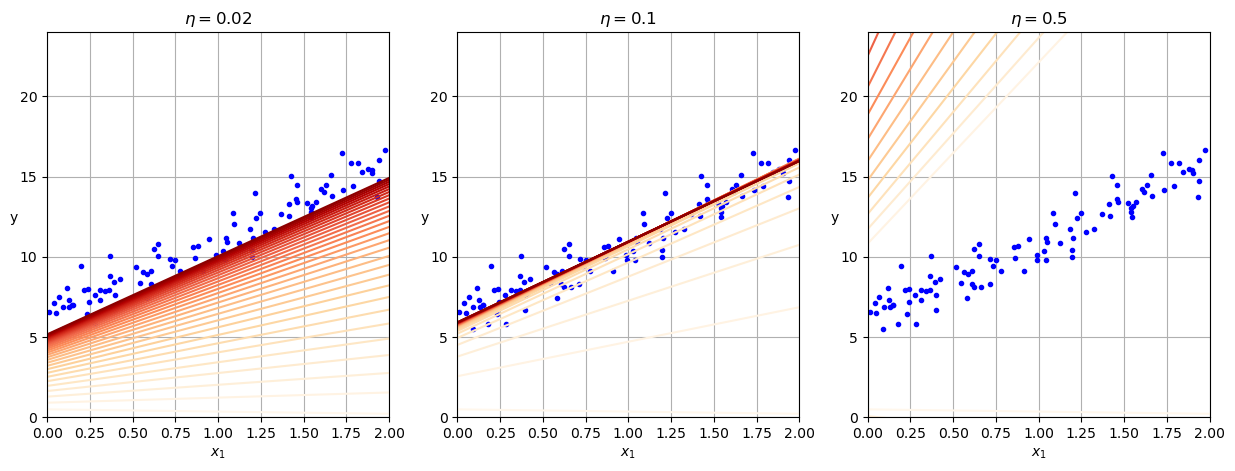

In [19]:
import matplotlib as mpl

def plot_gradient_descent(theta,eta):
    m=len(X_bias)
    n_epoch=1000
    n_shown=30
    plt.plot(X,y,"b.")
    theta_path=[]
    for epoch in range(n_epoch):
        if epoch<n_shown:
            y_predict=X_new_b @ theta
            color=mpl.colors.rgb2hex(plt.cm.OrRd(epoch/n_shown))
            plt.plot(X_new,y_predict,linestyle="solid",color=color)
        gradents=2/m * X_bias.T @ (X_bias @ theta-y)
        theta=theta - eta * gradents
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.ylabel("y",rotation=0)
    plt.axis([0, 2, 0, 24])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta=np.random.randn(2,1)
plt.figure(figsize=(15,5))
plt.subplot(131)
plot_gradient_descent(theta,0.02)
plt.subplot(132)
theta_path_bgd=plot_gradient_descent(theta,0.1)
plt.subplot(133)
plot_gradient_descent(theta,0.5)
plt.show()
        
            
        

In [20]:
tolerance=1e-6
for epoch in range(1000):
     gradents=2/m * X_bias.T @ (X_bias @ theta-y)
     if np.linalg.norm(gradents)<tolerance:
        print(f"Stopped at epoch {epoch}")
        break
     theta=theta-eta*gradents


Stopped at epoch 370


## Stochastic Gradient Descent

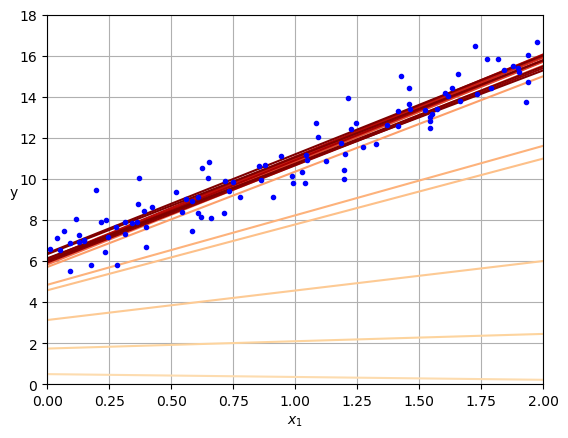

In [22]:
theta_path_sgd=[]
n_epoch=50
t0,t1=5,50

def learning_shedule(t):
    return t0/(t+t1)

n_shown=20

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epoch):
    for iteration in range(m):

        if epoch==0 and iteration<n_shown:
            y_predict=X_new_b@theta
            color=mpl.colors.rgb2hex(plt.cm.OrRd(iteration/n_shown+0.2))
            plt.plot(X_new,y_predict,color=color)
        random_index=np.random.randint(m)
        xi=X_bias[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T@(xi@theta-yi)
        eta=learning_shedule(epoch*m+iteration)
        theta=theta-eta*gradients
        theta_path_sgd.append(theta)
plt.plot(X,y,"b.") 
plt.grid()
plt.axis([0,2,0,18])
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)
plt.show()



In [23]:
theta

array([[6.21082141],
       [4.74850547]])

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-5,penalty=None,eta0=0.01,
                    n_iter_no_change=100,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [25]:
sgd_reg.intercept_,sgd_reg.coef_

(array([6.21243504]), array([4.77301413]))

## Mini-Batch Gradient Descent

[[6.25224121]
 [4.78970191]]


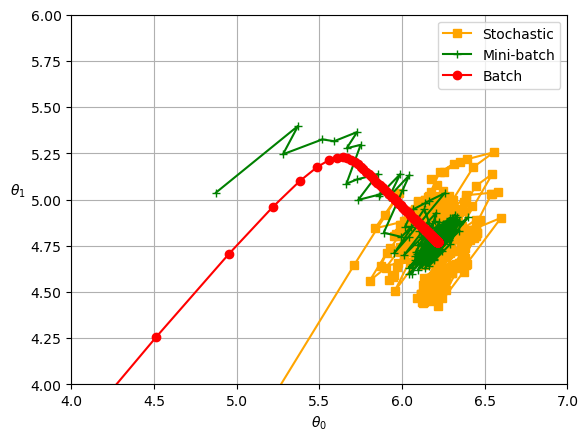

In [27]:
from math import ceil

n_epoch=50
minibatch_size=20
n_batches_per_epoch=ceil(m/minibatch_size)

np.random.seed(42)
theta=np.random.randn(2,1)
t0,t1=200,1000

def learning_schedule(t):
    return t0/(t+t1)
theta_path_mgd=[]

for epoch in range(n_epoch):
    shuffled_indices=np.random.permutation(m)
    X_bias_shuffled=X_bias[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for iteration in range(0,n_batches_per_epoch):
        idx=iteration*minibatch_size
        xi=X_bias_shuffled[idx:idx+minibatch_size]
        yi=y_shuffled[idx:idx+minibatch_size]
        gradients=2/minibatch_size*xi.T@(xi@theta-yi)
        eta=learning_schedule(epoch*n_batches_per_epoch+iteration)
        theta=theta-eta*gradients
        theta_path_mgd.append(theta)
print(theta)
theta_path_bgd=np.array(theta_path_bgd)  # Convert Python list in numpy array
theta_path_sgd=np.array(theta_path_sgd)
theta_path_mgd=np.array(theta_path_mgd)

plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],marker="s",color="orange",linestyle="-",label="Stochastic")
plt.plot(theta_path_mgd[:,0],theta_path_mgd[:,1],"g-+",label="Mini-batch")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],marker="o",color="red",linestyle="-",label="Batch")
plt.grid()
plt.legend()
plt.axis([4,7,4,6])
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$    ",rotation=0)
plt.show()


# Polynomial Regression

In [29]:
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3   # Shift to [–3, 3]
y=0.4*X**2 + X + 3 + np.random.randn(m,1)



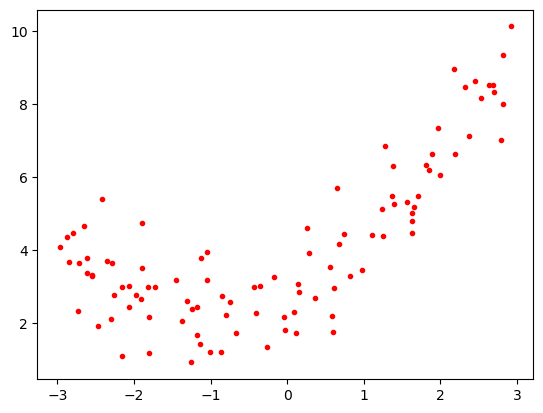

In [30]:
plt.plot(X,y,"r.")
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])


[-0.75275929]
[-0.75275929  0.56664654]


In [32]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)


LinearRegression()

In [33]:
lin_reg.coef_,lin_reg.intercept_

(array([[0.93366893, 0.46456263]]), array([2.78134581]))

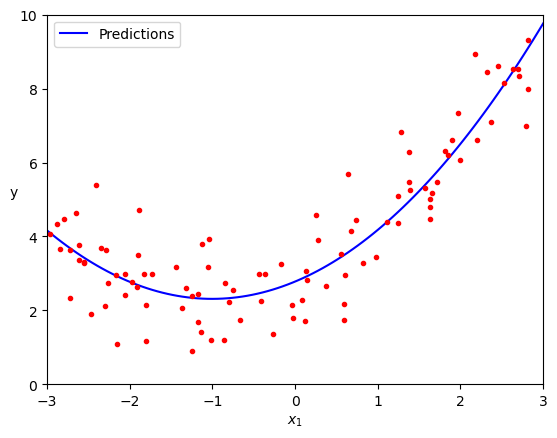

In [34]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg.predict(X_new_poly)

plt.plot(X_new,y_new,"b-",label="Predictions")
plt.plot(X,y,"r.")
plt.axis([-3, 3, 0, 10])
plt.legend()
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)
plt.show()

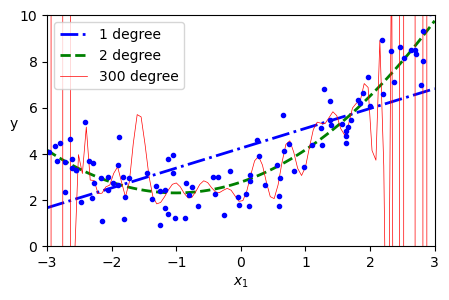

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
plt.figure(figsize=(5,3))

for style,width,degree in(("b-.",2,1),("g--",2,2),("r-",0.5,300)):
    poly_big_features=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()
    polynomial_regression=make_pipeline(poly_big_features,std_scaler,lin_reg)
    polynomial_regression.fit(X,y)
    y_new_big=polynomial_regression.predict(X_new)
    label=f"{degree} degree"
    plt.plot(X_new,y_new_big,style,label=label,linewidth=width)
plt.axis([-3,3,0,10])
plt.legend()
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("y",rotation=0)
plt.show()

    

## Learning Curves

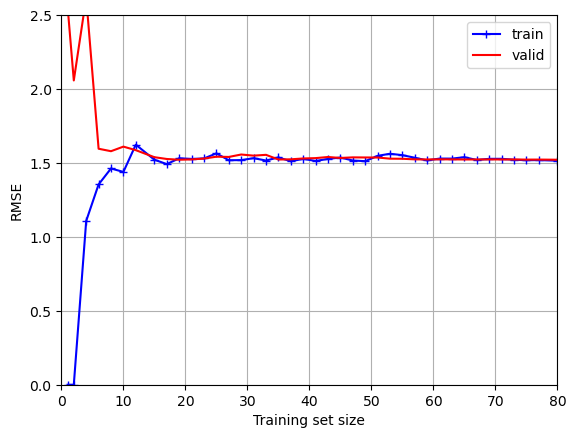

In [37]:
from sklearn.model_selection import learning_curve

train_sizes,train_score,valid_score=learning_curve(
    LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring="neg_root_mean_squared_error"    
)
train_errors=-train_score.mean(axis=1)
valid_errors=-valid_score.mean(axis=1)

plt.plot(train_sizes,train_errors,"b-+",label="train")
plt.plot(train_sizes,valid_errors,"r-",label="valid")
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.axis([0,80,0,2.5])
plt.grid()
plt.show()

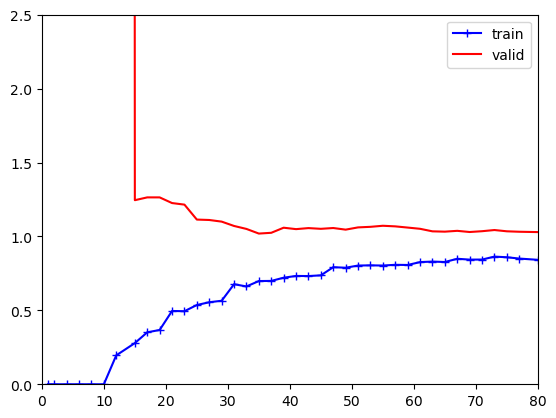

In [38]:
polynomial_regression=make_pipeline(
    PolynomialFeatures(degree=10,include_bias=False),
    LinearRegression()
)
train_sizes,train_score,valid_score=learning_curve(
    polynomial_regression,
    X,y,
    train_sizes=np.linspace(0.01,1.0,40),
    cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors= -train_score.mean(axis=1)
valid_errors= -valid_score.mean(axis=1)

plt.plot(train_sizes,train_errors,"b-+",label="train")
plt.plot(train_sizes,valid_errors,"r-",label="valid")
plt.axis([0,80,0,2.5])
plt.legend()
plt.show()

# Regularized Linear Models

## Ridge Regression

In [41]:
np.random.seed(42)
m=20
a=np.random.rand(m,1)
X=3*a
noise=np.random.randn(m,1)/1.5
y=1+ 0.7*X +noise
X_new=np.linspace(0,3,100).reshape(100,1)


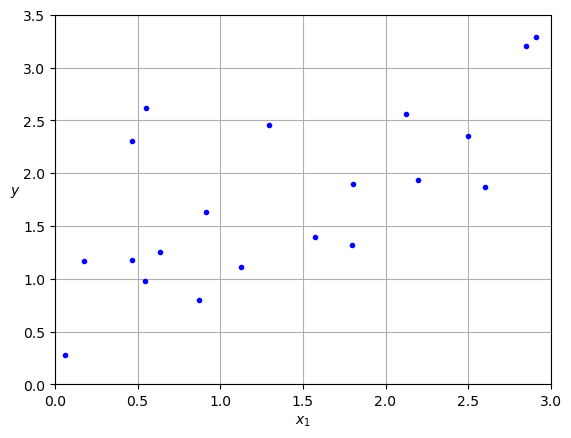

In [42]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [43]:
from sklearn.linear_model import Ridge

ridge_regression=Ridge(alpha=0.1,solver="cholesky")
ridge_regression.fit(X,y)
ridge_regression.predict([[1.5]])

array([[1.85310253]])

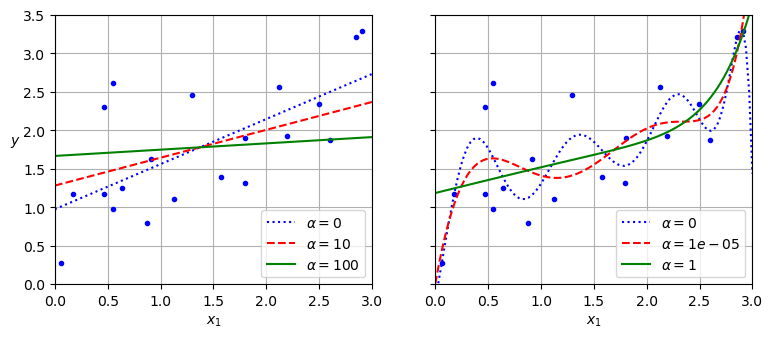

In [44]:
def plot_model(model_class,polynomial,alphas,**model_kwargs):
    plt.plot(X,y,"b.")
    for alphas,style in zip(alphas,("b:","r--","g-")):
        if alphas>0:
            model=model_class(alphas,**model_kwargs)
        else:
            model=LinearRegression()
        if polynomial:
            model=make_pipeline(
                PolynomialFeatures(degree=10,include_bias=False),
                StandardScaler(),
                model
            )
        model.fit(X,y)
        y_new_regularized=model.predict(X_new)
        plt.plot(X_new,y_new_regularized,style,label=fr"$\alpha ={alphas}$")
    
    plt.legend()
    plt.grid()
    plt.axis([0, 3, 0, 3.5])
    plt.xlabel("$x_1$")
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()


In [45]:
sgd_reg=SGDRegressor(penalty="l2",alpha=0.1/m,tol=None,
                    max_iter=1000,eta0=0.01,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.8529369])

## Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.83788174])

## Elastic Net Regresson

In [49]:
from sklearn.linear_model import ElasticNet

elasitc_reg=ElasticNet(alpha=0.1,l1_ratio=0.5)
elasitc_reg.fit(X,y)
elasitc_reg.predict([[1.5]])


array([1.84185586])

# Early Stopping

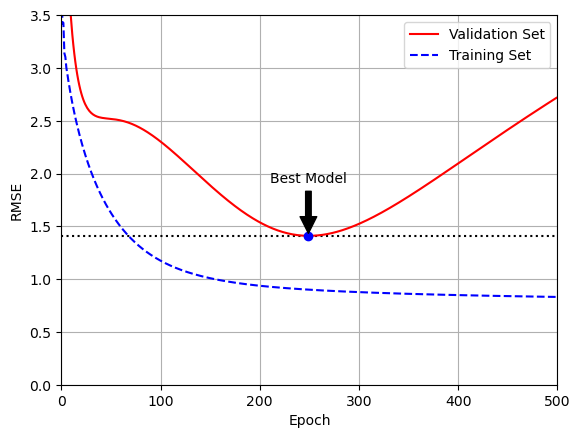

In [51]:
from sklearn.metrics import root_mean_squared_error
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2 +X+2+np.random.randn(m,1)
X_train,y_train=X[:m//2],y[:m//2,0]
X_valid,y_valid=X[m//2:],y[m//2:,0]

preprocessing=make_pipeline(PolynomialFeatures(degree=90,include_bias=False),
                           StandardScaler())
X_train_prep=preprocessing.fit_transform(X_train)
X_valid_prep=preprocessing.transform(X_valid)

sgd_reg=SGDRegressor(penalty=None,eta0=0.002,random_state=42)
n_epochs=500
best_valid_rmse=float('inf')

train_errors,valid_errors=[],[]

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep,y_train)
    y_valid_pred=sgd_reg.predict(X_valid_prep)
    val_error=root_mean_squared_error(y_valid,y_valid_pred)
    if val_error<best_valid_rmse:
        best_valid_rmse=val_error
        best_model=deepcopy(sgd_reg)
    y_train_pred=sgd_reg.predict(X_train_prep)
    train_error=root_mean_squared_error(y_train,y_train_pred)
    valid_errors.append(val_error)
    train_errors.append(train_error)

best_epoch=np.argmin(valid_errors)

plt.annotate('Best Model',
            xy=(best_epoch,best_valid_rmse),
            xytext=(best_epoch,best_valid_rmse+0.5),
            ha='center',
            arrowprops=dict(facecolor='black',shrink=0.05)
             
            )
plt.plot([0,n_epochs],[best_valid_rmse,best_valid_rmse],"k:")
plt.plot(valid_errors,"r-",label="Validation Set")
plt.plot(train_errors,"b--",label="Training Set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()
    

# Logistic Regression

## Estimating Probabilities

In [54]:
# Code shows how the Formula internally works

def sigmoid(z):
    return 1/(1+ np.exp(-z))

X=np.array([2,3])
theta=np.array([0.5,-0.4])
b=0.2

z=theta.dot(X) +b
p=sigmoid(z)

predicted_class=1 if p>0.5 else 0


print(p)
print(predicted_class)


0.5
0


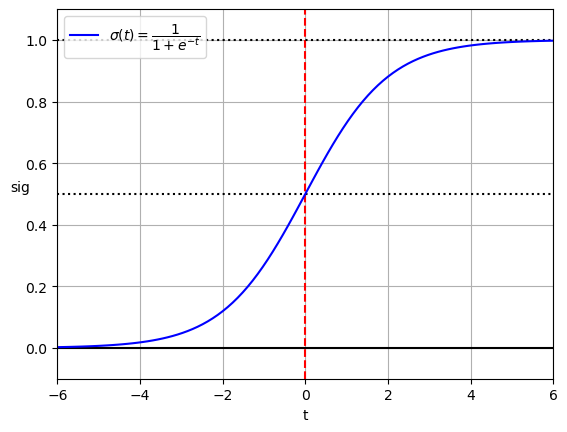

In [55]:
lim=6
t=np.linspace(-lim,lim,100)
sig=1/(1+np.exp(-t))

plt.plot([0,0],[-0.1,1.1],"r--")
plt.plot([-lim,lim],[0,0],"k-")
plt.plot([-lim,lim],[1,1],"k:")
plt.plot([-lim,lim],[0.5,0.5],"k:")
plt.plot(t,sig,"b-",label=r"$\sigma(t)=\dfrac{1}{1+e^{-t}}$")
plt.axis([-lim,lim, -0.1,1.1])
plt.xlabel("t")
plt.ylabel("sig",rotation=0)
plt.legend()
plt.grid()
plt.show()

In [56]:
from sklearn.metrics import log_loss
log_loss([1,0,1,0], [0.9,0.2,0.8,0.7])


0.4389051056530454

## Decision Boundaries

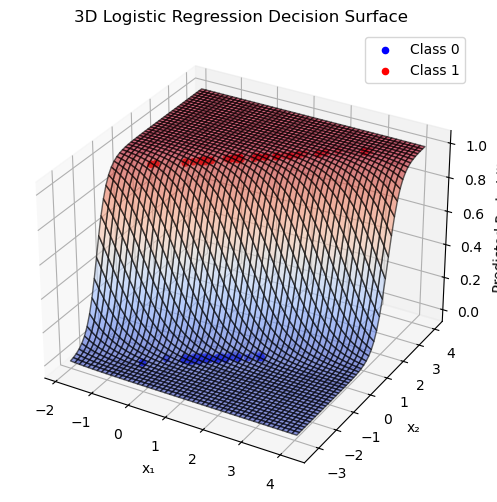

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 1. Create 2-feature binary classification dataset
X, y = make_classification(n_samples=100, n_features=2,
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

x1 = X[:, 0]
x2 = X[:, 1]

# 2. Train Logistic Regression
model = LogisticRegression()
model.fit(X, y)

# 3. Create grid to compute plane
xx, yy = np.meshgrid(np.linspace(x1.min()-1, x1.max()+1, 50),
                     np.linspace(x2.min()-1, x2.max()+1, 50))

# Decision boundary plane (probability = 0.5)
# θ₀ + θ₁x₁ + θ₂x₂ = 0 → solve for z
coef = model.coef_[0]
intercept = model.intercept_[0]
zz = -(coef[0] * xx + coef[1] * yy + intercept)  # Not used directly, just for formula reference

# 4. Compute predicted probabilities for the grid (for color)
probs = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
probs = probs.reshape(xx.shape)

# 5. Plot 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data points
ax.scatter(x1[y == 0], x2[y == 0], 0, c='blue', label='Class 0')
ax.scatter(x1[y == 1], x2[y == 1], 1, c='red', label='Class 1')

# Plot the surface (sigmoid outputs as z-axis)
ax.plot_surface(xx, yy, probs, cmap='coolwarm', alpha=0.6, edgecolor='k')

# Customize plot
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('Predicted Probability')
ax.set_title('3D Logistic Regression Decision Surface')
ax.legend()
plt.show()


In [59]:
from sklearn.datasets import load_iris
iris=load_iris(as_frame=True)


In [60]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [61]:
iris.data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
iris.target


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [63]:
iris.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X=iris.data[["petal width (cm)"]].values
y=iris.target_names[iris.target]=='virginica'

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)


LogisticRegression(random_state=42)

In [67]:
X_new=np.linspace(0,3,1000).reshape(-1,1)
y_proba=log_reg.predict_proba(X_new)
y_proba

# This is output and will return two class ,probability of not_in_class, and is_in_class
# array([[0.99820801, 0.00179199],
     #   [0.99818732, 0.00181268],
     #   [0.99816638, 0.00183362],
     #   ...,
     #   [0.00578965, 0.99421035],
     #   [0.00572381, 0.99427619], 
     #   [0.00565872, 0.99434128]])


# It will look like this-

#   array([
#   [p(class 0), p(class 1)],
#   [p(class 0), p(class 1)],
#   ...
# ])


array([[0.99820801, 0.00179199],
       [0.99818732, 0.00181268],
       [0.99816638, 0.00183362],
       ...,
       [0.00578965, 0.99421035],
       [0.00572381, 0.99427619],
       [0.00565872, 0.99434128]])

In [68]:
decision_boundary=X_new[y_proba[:,1]>=0.5][0,0] 
decision_boundary                                
# We want the point in (class 1) so [:,1] is done and  probability greater than 0.5 will return all the values after 0.5
# But we want the first value just after 0.5 (or itself 0.5 if it is present in the probability) so this is done->[0,0] 

1.6516516516516517

In [69]:
log_reg.predict([[1.7],[1.5],[1.652]])

array([ True, False,  True])

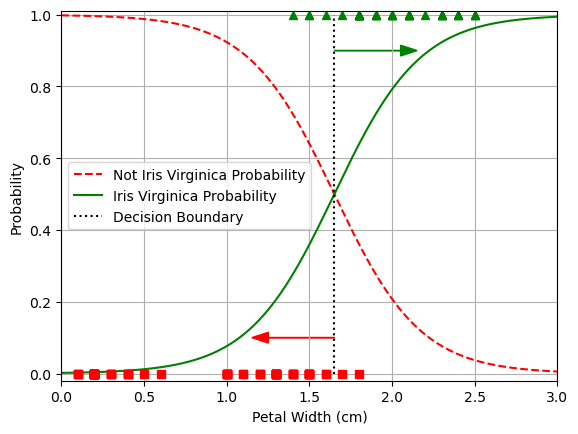

In [70]:
plt.plot(X_new,y_proba[:,0],"r--",label="Not Iris Virginica Probability")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris Virginica Probability")
plt.plot([decision_boundary,decision_boundary],[0,1],"k:",label="Decision Boundary")
plt.plot(X_train[y_train==0],y_train[y_train==0],"rs")
plt.plot(X_train[y_train==1],y_train[y_train==1],"g^")
plt.arrow(x=decision_boundary,
          y=0.90,
          dx=0.4,
          dy=0,
          head_width=0.03,
          head_length=0.1,
          fc="g",
          ec="g"
         )
plt.arrow(x=decision_boundary,
         y=0.1,
         dx=-0.4,
         dy=0,
          head_width=0.03,
          head_length=0.1,
          fc="r",
          ec="r"
          
         )
plt.axis([0,3,-0.02,1.01])
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")
plt.grid()
plt.legend()
plt.show()

## Softmax Regression

In [165]:
X=iris.data[["petal length (cm)","petal width (cm)"]].values
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

softmax_reg=LogisticRegression(C=30,random_state=42)
softmax_reg.fit(X_train,y_train)

LogisticRegression(C=30, random_state=42)

In [167]:
softmax_reg.predict([[5,2]])

array([2])

In [179]:
softmax_reg.predict_proba([[2,2,]]).round(2)

array([[0.93, 0.07, 0.  ]])